### Problem 1 (10 Points)

Sketch graphically the problem 

$$
\begin{aligned}
\min_{x_1,x_2} & \quad f({\bf x})=(x_1+1)^2+(x_2-2)^2\\
{\text{subject to }} & \quad g_1 = x_1-2\leq 0,{\quad} g_3 = -x_1\leq 0,\\
& \quad g_2 = x_2-1\leq 0, {\quad} g_4 = -x_2\leq 0.
\end{aligned}
$$

Find the optimum graphically. Determine directions of feasible descent at the corner points of the feasible domain. Show the gradient directions of $f$ and $g_i$s at these points. Verify graphical results analytically using the KKT conditions.

---
### Solution
---

First we plot the ojective function and the constraints. For the objective function, we plot its contour lines. 

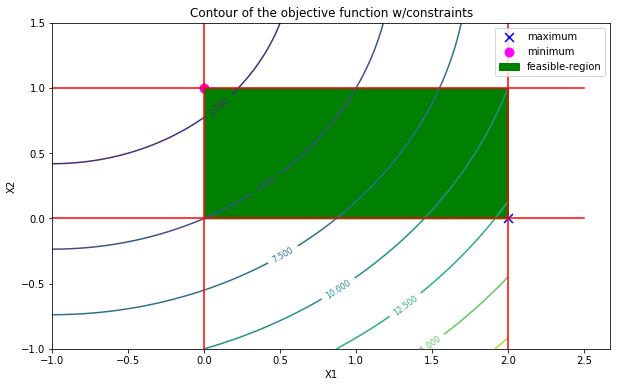

In [80]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np


X = np.linspace(-1, 2, 1000)
Y = np.linspace(-1, 2, 1000)

X, Y = np.meshgrid(X, Y)

Z = (X+1)**2 + (Y-2)**2


fig, axs = plt.subplots(1, 1, figsize=(10, 6))
cp = plt.contour(X, Y, Z)
#plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('X1')
plt.ylabel('X2')



y = np.linspace(-1,2.5)
plt.plot(2*np.ones(len(y)), y, c='red')
plt.plot(y, np.ones(len(y)), c = 'red')
plt.plot(np.zeros(len(y)), y, c='red')
plt.plot(y, np.zeros(len(y)), c='red')
plt.ylim([-1, 1.5])


plt.clabel(cp, inline=True, fontsize=8)
plt.title("Contour of the objective function w/constraints")  
plt.scatter(2, 0, marker='x', s=80, color='blue', label='maximum')
plt.scatter(0,1, marker='o', s=80, color='magenta', label='minimum')

x = np.linspace(0, 2, 100)
y = np.linspace(0, 1, 100)
plt.fill_between(x, y, 0, color='green', label='feasible-region')
plt.fill_between(x, y, 1, color='green')
plt.legend(loc='upper right')



plt.show()



From the plot above, we can see that the minimizer is $(x_1, x_2) = (0, 1)$ and the maximizer is $(x_1, x_2) = (2, 0)$

### Direction of feasible descent at the corner points: 

To determine the direction of feasible descents at the corner points we take the gradient of the ojective function first and evaluate at the corner points. Then we find the gradient of the activate constraints at the same points.


$$
\begin{aligned}
\quad\nabla f({\bf x})=\begin{pmatrix} 2x_1 + 2 \\
                                       2x_2 -4 \\
                                       \end{pmatrix}\\
\end{aligned}
$$

The gradients of the constraints are:

So, 
$$
\begin{aligned}
\quad\nabla g_1 &=\begin{pmatrix} 1 \\
                                 0 \\
                                       \end{pmatrix}\\  
\quad\nabla g_2 &=\begin{pmatrix} 0 \\
                                 1 \\
                                       \end{pmatrix}\\                      
\quad\nabla g_3 &=\begin{pmatrix} -1 \\
                                 0 \\
                                       \end{pmatrix}\\
\quad\nabla g_4 &=\begin{pmatrix} 0 \\
                                 -1 \\
                                       \end{pmatrix}\\  
\end{aligned}
$$


The active constraints at the minimizer $(0, 1)$ are: $g_2\;\text{and}\;g_3$ and the gradient of the objective function is:

$$
\begin{aligned}
\quad\nabla f({\bf x})=\begin{pmatrix} 2 \\
                                       -2 \\
                                       \end{pmatrix}\\
\end{aligned}
$$

Similarly, the active constraints at the maximizer $(2, 0)$ are: $g_1\;\text{and}\;g_4$ and the gradient of the objective function is:
$$
\begin{aligned}
\quad\nabla f({\bf x})=\begin{pmatrix} 6 \\
                                       -4 \\
                                       \end{pmatrix}\\
\end{aligned}
$$

Plotting the above gradients in the above plot:

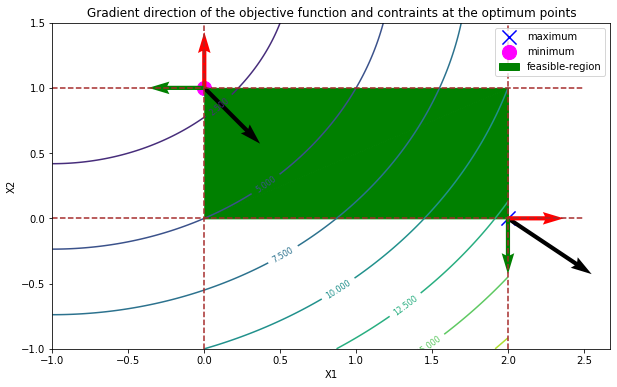

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np


X = np.linspace(-1, 2, 1000)
Y = np.linspace(-1, 2, 1000)

X, Y = np.meshgrid(X, Y)

Z = (X+1)**2 + (Y-2)**2


fig, axs = plt.subplots(1, 1, figsize=(10, 6))
cp = plt.contour(X, Y, Z)
#plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('X1')
plt.ylabel('X2')



y = np.linspace(-1,2.5)
plt.plot(2*np.ones(len(y)), y, c='brown', linestyle='dashed')
plt.plot(y, np.ones(len(y)), c='brown', linestyle='dashed')
plt.plot(np.zeros(len(y)), y, c='brown', linestyle='dashed')
plt.plot(y, np.zeros(len(y)), c='brown', linestyle='dashed')
plt.ylim([-1, 1.5])


plt.clabel(cp, inline=True, fontsize=8)
plt.title("Gradient direction of the objective function and contraints at the optimum points")  
plt.scatter(2, 0, marker='x', s=200, color='blue', label='maximum')
plt.scatter(0,1, marker='o', s=200, color='magenta', label='minimum')

x = np.linspace(0, 2, 100)
y = np.linspace(0, 1, 100)
plt.fill_between(x, y, 0, color='green', label='feasible-region')
plt.fill_between(x, y, 1, color='green')
plt.legend(loc='upper right')

origin1 = np.array([0, 1])
plt.quiver(*origin1, [1, 0, -1], [-1, 1 ,0], color=['black', 'red', 'green'], scale=10)

origin2 = np.array([2, 0])
plt.quiver(*origin2, [1.5, 1, 0], [-1, 0 ,-1], color=['black', 'red', 'green'], scale=10)

plt.show()

---------------------------------------------------------

**The optimum value is $f = 2$ at $(x_1, x_2) = (0, 1)$**

----------------------------------------------------------

### Analytical Solution Using KKT conditions:
---

For KKT conditions, we need Lagrangian, which is defined as:

$$
\begin{aligned}
\quad \mathcal{L} =\quad f + \mu_1 g_1 + \mu_2 g_2 + \mu_3 g_3 + \mu_4 g_4 \\
\end{aligned}
$$

where, $\mu_i$s are the dual variables (aka lagrange multipliers) for the inequality constraints $g_i$s.

$$
\begin{aligned}
\quad \mathcal{L} = (x_1+1)^2+(x_2-2)^2 + \mu_1 (x_1-2) + \mu_2 (x_2-1) + \mu_3 (-x_1) + \mu_4 (-x_4) \\
\end{aligned}
$$

Then, the gradient of the Lagrangian is:

$$
\begin{aligned}
\quad \nabla \mathcal{L} = \begin{pmatrix} 2x_1 + 2 + \mu_1 - \mu_3\\
                                       2x_2 -4 + \mu_2 - \mu_4 \\
                                       \end{pmatrix}\\
\end{aligned}
$$

Set $\nabla \mathcal{L} = 0$

$$
\begin{aligned}
\begin{pmatrix} 2x_1 + 2 + \mu_1 - \mu_3\\
                                       2x_2 -4 + \mu_2 - \mu_4 \\
                                       \end{pmatrix} &= \begin{pmatrix} 0 \\
                                                                        0 \end{pmatrix}\\
\end{aligned}
$$


Then, at the minimum, taking $g_2$ and $g_3$ as activate constraints (usually we can guess when we don't have any representation of the objective function). Then, using the matrix above along with the active constraints, we can solve for $\mu_i$s (note: $\mu_1 = \mu_4 = 0$):

We get $\mu_2 = 2$, $\mu_3 = 2$, $x_1 = 0$ and $x_2 = 1$. 

As $\mu_2 > 0$ and $\mu_3 > 0$, and the feasible region is convex, <b> the minimum occurs at (0, 1) and the minimum value is 2. </b>

#### Hence, the result is consistent with the graphical method.


### Problem 2 (10 Points)

Graph the problem 

$$
\begin{aligned}
\min_{x_1,x_2} & \quad  f=-x_1\\
{\text{subject to }} & \quad g_1=x_2-(1-x_1)^3\leq 0{\quad} {\rm and}{\quad} x_2\geq 0.
\end{aligned}
$$ 

Find the solution graphically. Then apply the optimality conditions. Can you find a solution based on the optimality conditions? Why? (From Kuhn and Tucker, 1951.)

---
Solution: Graphically
---

Text(0.5, 1.0, 'Objective function w/constraints and feasible region')

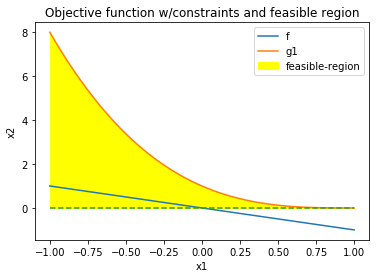

In [21]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
g = (1-x)**3

plt.plot(x, -x, label='f')
plt.plot(x, g, label = 'g1')
plt.plot(x, np.zeros(len(x)), linestyle='dashed')

plt.fill_between(x, g, 0, color='yellow', label='feasible-region')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Objective function w/constraints and feasible region")

From the plot above, we can observe that the minimum value for the given constraints occurs at $\mathbf{(x_1, x_2) = (0, 0)}$. 

### Solution using optimality condition

The Lagrangian of the optimization problem is: 

$$
\begin{aligned}
\quad \mathcal{L} &=\quad f + \mu_1 g_1 + \mu_2 (-x_2) \\
                  &=\quad -x_1 + \mu_1 (x_2-(1-x_1)^3)  + \mu_2 (-x_2) \\
\end{aligned}
$$

Then, the gradient of the Lagrangian is:

$$
\begin{aligned}
\quad \nabla \mathcal{L} = \begin{pmatrix} 3\mu_1(x_1 - 1)^2 -1\\
                                       \mu_1 - \mu_2 \\
                                       \end{pmatrix}\\
\end{aligned}
$$

Set $\nabla \mathcal{L} = 0$

$$
\begin{aligned}
\begin{pmatrix} 3\mu_1(x_1 - 1)^2 -1\\
                                       \mu_1 - \mu_2 \\
                                       \end{pmatrix} &= \begin{pmatrix} 0 \\
                                                                        0 \end{pmatrix}\\
\end{aligned}
$$

The above matrix doesn't lead to a solution. The constraints are not linearly independent. For KKT conditions to reach optimum value, the constraints should be linearly independent.

### Problem 3 (30 Points)

Find a local solution to the problem 

$$
\begin{aligned}
\min_{x_1,x_2,x_3} & \quad  f=x_1x_2+x_2x_3+x_1x_3\\
{\text{subject to }} & \quad h=x_1+x_2+x_3-3=0.
\end{aligned}
$$ 

Use two methods: reduced gradient and Lagrange multipliers.

### Solution 1: Using Reduced Gradient
---

In reduced gradient method, first, we need to identify the number of constraints (m). Here, m = 1.

So, there must be n - m decision variables, where n = 3. Hence, $d \in \mathbb{R}^2$ and $s \in \mathbb{R}^1$

We pick $x_1$ as state variable and $x_2, x_3$ as decision variables. Then: 

$x = \begin{pmatrix}d \\ s\end{pmatrix}$

Now, 

$$
\begin{aligned}
\frac{\partial f}{\partial d} &= \begin{pmatrix} x_1 + x_3 \\ x_1 + x_2\end{pmatrix}\\
\frac{\partial f}{\partial s} &= x_2 + x_3 \\
\frac{\partial h}{\partial d} &= \begin{pmatrix} 1 \\ 1\end{pmatrix}\\
\frac{\partial h}{\partial s} &= 1\\ \\
\text{And,}\\
\frac{df}{dd} &= \frac{\partial f}{\partial d} - \left(\frac{\partial f}{\partial s}\right)\left(\frac{\partial h}{\partial s} \right)^{-1} \frac{\partial h}{\partial d}\\
              &= \begin{pmatrix} x_1 + x_3 \\ x_1 + x_2\end{pmatrix} - (x_2 + x_3) (1) \begin{pmatrix} 1 \\ 1\end{pmatrix}\\
              &= \begin{pmatrix} x_1 + x_3 \\ x_1 + x_2\end{pmatrix} - \begin{pmatrix} x_2 + x_3 \\ x_2 + x_3\end{pmatrix}\\
              &= \begin{pmatrix} x_1 - x_2  \\ x_1 - x_3\end{pmatrix}\\
\end{aligned}
$$

Set $\frac{df}{dd} = 0$. We get: $x_1 = x_2 = x_3$. Plugging these back into the constraints results in:

$$
\begin{aligned}
x_1 = x_2 = x_3 = 1
\end{aligned}
$$

To verify that the above solutions are indeed local minimum we need to show that second order optimality condition holds. 

The second order optimality condition is: $\frac{d^2 f}{dd^2} = 0$



### Problem 4 (20 Points)

Use reduced gradient to	find the value(s) of the parameter $b$ for which the point $x_1=1$, $x_2=2$ is the solution to the problem 

$$
\begin{aligned}
\min_{x_1,x_2} & \quad  f=2x_{1} + bx_2\\
{\text{subject to }} & \quad g_1 = x_{1}^{2}+ x_{2}^{2}-5\leq 0\\
& \quad g_2= x_1- x_2-2\leq 0.
\end{aligned}
$$ 


### Problem 5 (30 Points)

Find the solution for 

$$
\begin{aligned}
\min_{x_1,x_2,x_3} & \quad  f=x_{1}^{2}+x_{2}^{2}+x_{3}^{2}\\
{\text{subject to }} & \quad h_1 = x_{1}^{2}/4+x_{2}^{2}/5+x_{3}^{2}/25-1=0\\
& \quad h_2 = x_1+x_2-x_3= 0,
\end{aligned}
$$ 

by implementing the generalized reduced gradient algorithm.